In [1]:
import json

In [2]:
from gluonts.model.deepar import DeepAREstimator
from gluonts.mx import Trainer

In [3]:
deepar = DeepAREstimator(freq="D", prediction_length=7, trainer=Trainer(epochs=30), use_feat_static_cat=True)

In [4]:
deepar_schema = deepar.get_schema()

In [5]:
print(deepar_schema)

Schema(fields={'start': PandasPeriodField(freq=<Day>), 'target': NumpyArrayField(dtype=<class 'numpy.float32'>, ndim=1), 'feat_static_cat': NumpyArrayField(dtype=<class 'numpy.int32'>, ndim=1)})


In [14]:
dataset = []
with open('../data/train.json', 'r') as train_file:
    for line in train_file.readlines():
        datasource = json.loads(line)
        new_data = deepar_schema(datasource, inplace=False)
        dataset.append(new_data)

In [15]:
model = deepar.train(dataset)

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 50/50 [00:01<00:00, 40.30it/s, epoch=30/30, avg_epoch_loss=4.1]


In [16]:
from gluonts.evaluation import make_evaluation_predictions

In [17]:
forecast_it, ts_it = make_evaluation_predictions(
    dataset=dataset,  # test dataset
    predictor=model,  # predictor
    num_samples=250,  # number of sample paths we want for evaluation
)

In [18]:
forecasts = list(forecast_it)
tss = list(ts_it)

In [19]:
ts_entry = tss[8]
forecast_entry = forecasts[8]

In [20]:
def plot_prob_forecasts(ts_entry, forecast_entry):
    plot_length = 150
    prediction_intervals = (50.0, 90.0)
    legend = ["observations", "median prediction"] + [f"{k}% prediction interval" for k in prediction_intervals][::-1]

    fig, ax = plt.subplots(1, 1, figsize=(10, 7))
    ts_entry[-plot_length:].plot(ax=ax)  # plot the time series
    forecast_entry.plot(prediction_intervals=prediction_intervals, color='g')
    plt.grid(which="both")
    plt.legend(legend, loc="upper left")
    plt.show()

In [22]:
%matplotlib inline
import matplotlib.pyplot as plt

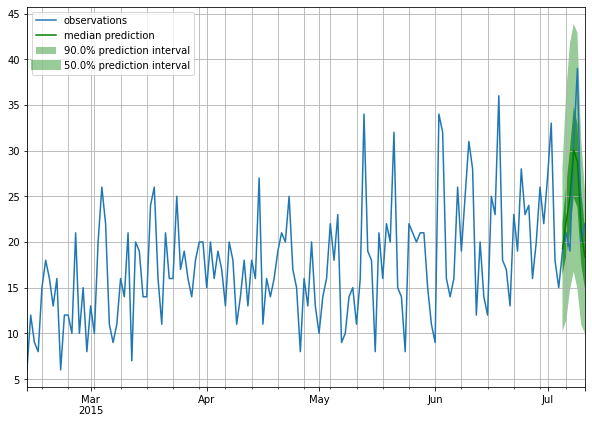

In [23]:
plot_prob_forecasts(ts_entry, forecast_entry)